In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress
import seaborn as sns

In [2]:
# Read in CSV
allergy_df=pd.read_csv('data/food-allergy-analysis-Zenodo.csv')

In [3]:
# Show head of CSV
allergy_df.head()

,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Attain column names
allergy_df.columns

Index(['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', 'SHELLFISH_ALG_START',
       'SHELLFISH_ALG_END', 'FISH_ALG_START', 'FISH_ALG_END', 'MILK_ALG_START',
       'MILK_ALG_END', 'SOY_ALG_START', 'SOY_ALG_END', 'EGG_ALG_START',
       'EGG_ALG_END', 'WHEAT_ALG_START', 'WHEAT_ALG_END', 'PEANUT_ALG_START',
       'PEANUT_ALG_END', 'SESAME_ALG_START', 'SESAME_ALG_END',
       'TREENUT_ALG_START', 'TREENUT_ALG_END', 'WALNUT_ALG_START',
       'WALNUT_ALG_END', 'PECAN_ALG_START', 'PECAN_ALG_END',
       'PISTACH_ALG_START', 'PISTACH_ALG_END', 'ALMOND_ALG_START',
       'ALMOND_ALG_END', 'BRAZIL_ALG_START', 'BRAZIL_ALG_END',
       'HAZELNUT_ALG_START', 'HAZELNUT_ALG_END', 'CASHEW_ALG_START',
       'CASHEW_ALG_END', 'ATOPIC_DERM_START', 'ATOPIC_DERM_END',
       'ALLERGIC_RHINITIS_START', 'ALLERGIC_RHINITIS_END', 'ASTHMA_START',
       'ASTHMA_END', 'FIRST_ASTHMARX', 'L

In [5]:
# Get basic statistical data about dataset
allergy_df.describe()

,SUBJECT_ID,BIRTH_YEAR,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,SHELLFISH_ALG_END,FISH_ALG_START,FISH_ALG_END,MILK_ALG_START,MILK_ALG_END,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
count,333200.000000,333200.000000,333200.000000,333200.000000,5246.000000,1051.000000,1796.000000,527.000000,7289.000000,4580.000000,...,121.000000,49515.000000,41732.000000,55567.000000,25326.000000,63874.000000,25465.000000,117550.000000,117550.000000,117550.000000
mean,166600.500000,2001.261191,3.942140,10.336654,8.724076,6.431159,6.628690,5.337775,3.287408,2.473547,...,5.293306,4.282436,5.665702,7.275146,12.930347,5.979887,12.377142,6.439342,8.943442,5.298477
std,96186.699184,6.603479,4.646174,5.623426,5.273093,4.475387,5.015358,4.190826,4.098283,3.108223,...,3.821768,4.683577,5.016386,4.190266,4.292382,4.390784,4.895197,4.863507,5.284163,6.486661
min,1.000000,1983.000000,-4.312115,1.002053,0.093087,0.169747,0.076660,0.076660,-60.112252,-4.008214,...,0.112252,-103.961670,0.013689,-95.238877,2.488706,1.002053,3.003422,1.002053,1.002053,1.000000
25%,83300.750000,1996.000000,0.021903,5.289528,3.975359,2.620123,2.235455,1.934292,0.747433,0.561259,...,2.335387,0.654346,1.448323,3.912389,9.591376,2.165640,8.139630,2.105407,4.298426,1.000000
50%,166600.500000,2002.000000,1.763176,10.193018,8.361396,5.305955,5.156742,3.939767,1.420945,1.200548,...,4.383299,2.255989,4.112252,6.721424,13.199179,4.807666,12.539357,5.023956,8.268309,3.000000
75%,249900.250000,2007.000000,7.208761,15.616701,13.078029,9.609856,10.251198,7.885010,4.295688,2.997947,...,7.227926,6.811773,8.926078,10.220397,16.579740,9.095140,16.843258,10.012320,13.341547,7.000000
max,333200.000000,2012.000000,17.984942,18.997947,24.298426,18.778919,22.499658,18.962355,25.431896,17.911020,...,17.264887,23.342916,24.626968,23.649555,28.616016,23.649555,28.522930,18.997947,18.997947,118.000000


In [6]:
# Attain info about amount of participants and the ages of the first record from the participants
total_rows= allergy_df.count()['SUBJECT_ID']
earliest_allergy_test_age_start=allergy_df[(allergy_df['AGE_START_YEARS']<=0)==False].min()['AGE_START_YEARS']
latest_allergy_test_age_start=allergy_df[(allergy_df['AGE_START_YEARS']<=0)==False].max()['AGE_START_YEARS']
ages_under_0_count=allergy_df[allergy_df['AGE_START_YEARS']<0].count()['SUBJECT_ID']
ages_equal_0_count=allergy_df[allergy_df['AGE_START_YEARS']==0].count()['SUBJECT_ID']
ages_under_10_count=allergy_df[allergy_df['AGE_START_YEARS']<10].count()['SUBJECT_ID']
ages_under_16_count=allergy_df[allergy_df['AGE_START_YEARS']<16].count()['SUBJECT_ID']
ages_error_count=allergy_df[allergy_df['AGE_START_YEARS'] >= allergy_df['AGE_END_YEARS']].count()['SUBJECT_ID']


print(f'\n Total Number of Rows   : {total_rows}\n',
      f'\n Earliest Age Testing Start  : {earliest_allergy_test_age_start}\n'
      f'\n Latest Age Testing  Start    : {latest_allergy_test_age_start}\n'
      f'\n Number of AGE_START_YEARS < 0   : {ages_under_0_count}\n',
      f'Number of AGE_START_YEARS = 0   : {ages_equal_0_count}\n',
      f'Number of AGE_START_YEARS < 10  : {ages_under_10_count}\n',
      f'Number of AGE_START_YEARS < 16  : {ages_under_16_count}\n',
      f'Number of AGE_START_YEARS <= AGE_END_YEARS  : {ages_error_count}\n')



 Total Number of Rows   : 333200
 
 Earliest Age Testing Start  : 0.0027378507871321

 Latest Age Testing  Start    : 17.9849418206708

 Number of AGE_START_YEARS < 0   : 25
 Number of AGE_START_YEARS = 0   : 338
 Number of AGE_START_YEARS < 10  : 283391
 Number of AGE_START_YEARS < 16  : 330492
 Number of AGE_START_YEARS <= AGE_END_YEARS  : 0



In [7]:
# Attain info about amount of participants and the ages of the last record from the participants
total_rows= allergy_df.count()['SUBJECT_ID']
earliest_allergy_test_age_end=allergy_df[(allergy_df['AGE_END_YEARS']<=0)==False].min()['AGE_END_YEARS']
latest_allergy_test_age_end=allergy_df[(allergy_df['AGE_END_YEARS']<=0)==False].max()['AGE_END_YEARS']
ages_under_0_count=allergy_df[allergy_df['AGE_END_YEARS']<0].count()['SUBJECT_ID']
ages_equal_0_count=allergy_df[allergy_df['AGE_END_YEARS']==0].count()['SUBJECT_ID']
ages_under_10_count=allergy_df[allergy_df['AGE_END_YEARS']<10].count()['SUBJECT_ID']
ages_under_16_count=allergy_df[allergy_df['AGE_END_YEARS']<16].count()['SUBJECT_ID']


print(f'\n Total Number of Rows   : {total_rows}\n',
      f'\n Earliest Age Testing End    : {earliest_allergy_test_age_end}\n'
      f'\n Latest Age Testing End      : {latest_allergy_test_age_end}\n'
      f'\n Number of AGE_END_YEARS < 0   : {ages_under_0_count}\n',
      f'Number of AGE_END_YEARS = 0   : {ages_equal_0_count}\n',
      f'Number of AGE_END_YEARS < 10  : {ages_under_10_count}\n',
      f'Number of AGE_END_YEARS < 16  : {ages_under_16_count}\n')



 Total Number of Rows   : 333200
 
 Earliest Age Testing End    : 1.00205338809035

 Latest Age Testing End      : 18.9979466119097

 Number of AGE_END_YEARS < 0   : 0
 Number of AGE_END_YEARS = 0   : 0
 Number of AGE_END_YEARS < 10  : 163201
 Number of AGE_END_YEARS < 16  : 255379



In [8]:
# Find values that are missing in terms of start and end ages

test_duration=allergy_df['AGE_END_YEARS']-allergy_df['AGE_START_YEARS']
start_age_missing=len(allergy_df[allergy_df['AGE_START_YEARS'].isna()==True])
end_age_missing=len(allergy_df[allergy_df['AGE_END_YEARS'].isna()==True])

test_duration_df=test_duration.describe().to_frame()
test_duration_df.columns=['Test Duration Summary']
print(f' Start AGE Missing :  {start_age_missing}\n',   
      f'End AGE Missing :  {end_age_missing}\n')

    

test_duration_df

 Start AGE Missing :  0
 End AGE Missing :  0



,Test Duration Summary
count,333200.000000
mean,6.394514
std,3.391921
min,1.002053
25%,3.427789
50%,6.157426
75%,9.212868
max,12.982888


In [9]:
# Find info about rows & ages

total_rows= allergy_df.count()['SUBJECT_ID']
earliest_allergy_test_year=allergy_df.min()['BIRTH_YEAR']
latest_allergy_test_year=allergy_df.max()['BIRTH_YEAR']
ages_under_0_count=allergy_df[allergy_df['AGE_START_YEARS']<0].count()['SUBJECT_ID']
ages_equal_0_count=allergy_df[allergy_df['AGE_START_YEARS']==0].count()['SUBJECT_ID']
ages_under_10_count=allergy_df[allergy_df['AGE_START_YEARS']<10].count()['SUBJECT_ID']
ages_under_16_count=allergy_df[allergy_df['AGE_START_YEARS']<16].count()['SUBJECT_ID']
ages_error_count=allergy_df[allergy_df['AGE_START_YEARS'] >= allergy_df['AGE_END_YEARS']].count()['SUBJECT_ID']


print(f'\n Total Number of Rows   : {total_rows}\n',
      f'\n Earliest Age Testing Start  : {earliest_allergy_test_age_start}\n'
      f'\n Latest Age Testing  Start    : {latest_allergy_test_age_start}\n'
      f'\n Number of AGE_START_YEARS < 0   : {ages_under_0_count}\n',
      f'Number of AGE_START_YEARS = 0   : {ages_equal_0_count}\n',
      f'Number of AGE_START_YEARS < 10  : {ages_under_10_count}\n',
      f'Number of AGE_START_YEARS < 16  : {ages_under_16_count}\n',
      f'Number of AGE_START_YEARS <= AGE_END_YEARS  : {ages_error_count}\n')



 Total Number of Rows   : 333200
 
 Earliest Age Testing Start  : 0.0027378507871321

 Latest Age Testing  Start    : 17.9849418206708

 Number of AGE_START_YEARS < 0   : 25
 Number of AGE_START_YEARS = 0   : 338
 Number of AGE_START_YEARS < 10  : 283391
 Number of AGE_START_YEARS < 16  : 330492
 Number of AGE_START_YEARS <= AGE_END_YEARS  : 0



<AxesSubplot:>

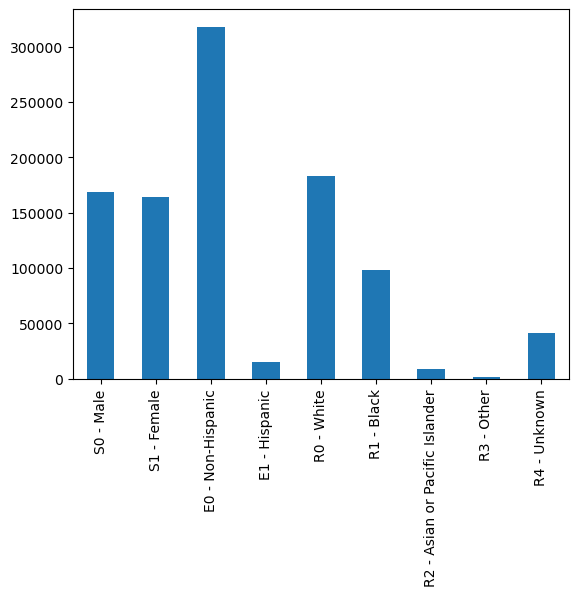

In [10]:
# Plot the demographic data

pd.concat([allergy_df.groupby('GENDER_FACTOR').count(),
          allergy_df.groupby('ETHNICITY_FACTOR').count(),
          allergy_df.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar")

In [11]:
# Create a function to clean individual allergens

def clean_DataFrame(allergen):
    allergen_start_column=allergen.upper()+'_ALG_START'
    allergen_end_column=allergen.upper()+'_ALG_END'
    
    allergen_df=allergy_df[['SUBJECT_ID', 'BIRTH_YEAR', 'GENDER_FACTOR', 'RACE_FACTOR',
       'ETHNICITY_FACTOR', 'PAYER_FACTOR', 'ATOPIC_MARCH_COHORT',
       'AGE_START_YEARS', 'AGE_END_YEARS', allergen_start_column,
       allergen_end_column]].copy()

    allergen_df_clean=allergen_df[(allergen_df[allergen_start_column].isna()==False)]
    allergen_df_clean.reset_index(inplace=True,drop=True)
    
    return allergen_df_clean


In [12]:
# Analyze fish allergen group (begin by filling NA values with zero due to the NA meaning no recorded response from study)

fish_df_clean=clean_DataFrame('fish')

nan_count=len(fish_df_clean[fish_df_clean['FISH_ALG_END'].isna()==True])

fish_df_clean.fillna(0.0,inplace=True)
print (f'\n{nan_count} number of NAs in the FISH_ALG_END column filled with zeros.\n')
fish_df_clean.head()


1269 number of NAs in the FISH_ALG_END column filled with zeros.



,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,FISH_ALG_START,FISH_ALG_END
0,402,1991,S1 - Female,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,P0 - Non-Medicaid,False,10.401095,18.669405,16.763860,0.000000
1,430,1997,S0 - Male,R2 - Asian or Pacific Islander,E0 - Non-Hispanic,P0 - Non-Medicaid,False,4.090349,15.665982,6.819986,6.819986
2,595,1996,S0 - Male,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,9.196441,16.024641,15.342916,15.342916
3,842,1997,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,5.396304,16.763860,6.524298,6.524298
4,1001,1996,S0 - Male,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,5.043121,16.495551,6.132786,0.000000


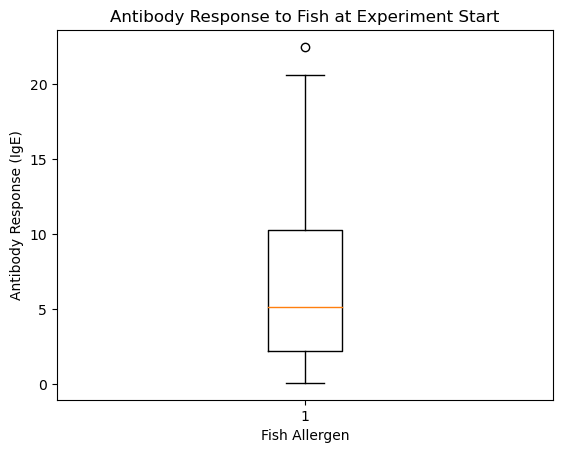

In [13]:
# Create a boxplot to visualize fish antibody response at the beginning of the study

fig1, ax1 = plt.subplots()
ax1.set_title('Antibody Response to Fish at Experiment Start')
ax1.set_ylabel("Antibody Response (IgE)")
ax1.set_xlabel("Fish Allergen")
ax1.boxplot(fish_df_clean["FISH_ALG_START"])
plt.show()

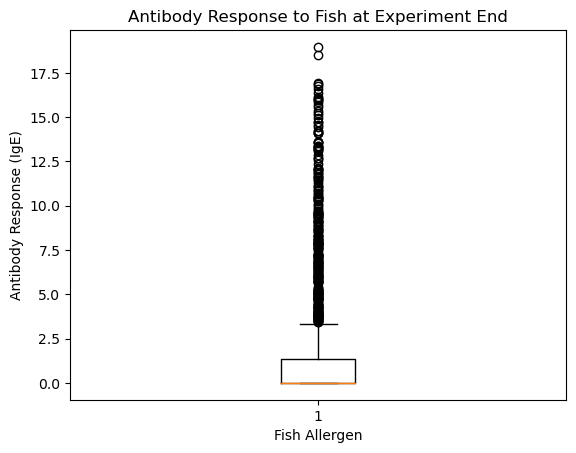

In [14]:
# Create a boxplot to visualize fish antibody response at the end of the study

fig1, ax1 = plt.subplots()
ax1.set_title('Antibody Response to Fish at Experiment End')
ax1.set_ylabel("Antibody Response (IgE)")
ax1.set_xlabel("Fish Allergen")
ax1.boxplot(fish_df_clean["FISH_ALG_END"])
plt.show()

Text(0.5, 1.0, 'All Ages')

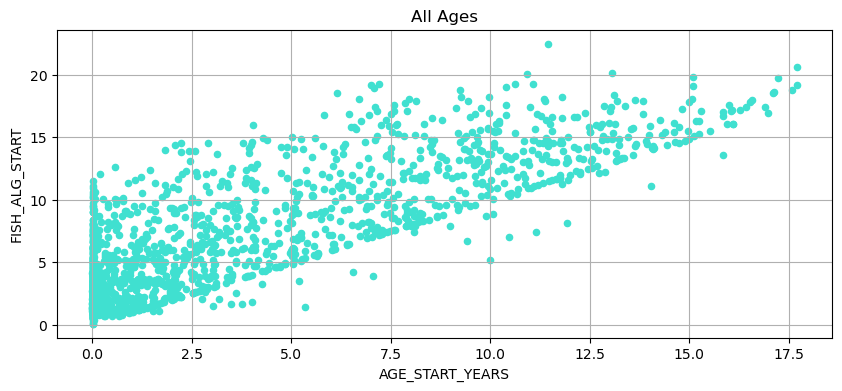

In [15]:
# Visualize the first recorded age of each participant in a scatter plot

fish_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="FISH_ALG_START", grid=True,figsize=(10,4), color='turquoise')
plt.title('All Ages')

Text(0.5, 1.0, 'Under One Year Old')

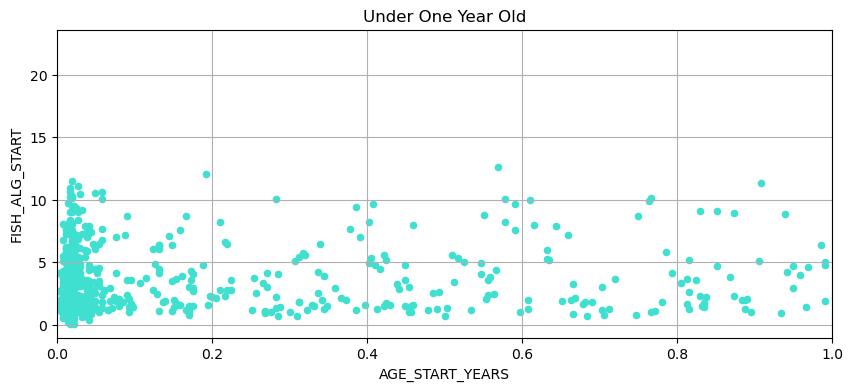

In [16]:
# Visualize infant data in a scatter plot

fish_df_clean.plot(kind="scatter", x="AGE_START_YEARS", y="FISH_ALG_START", grid=True,figsize=(10,4), color='turquoise')
plt.xlim(0,1)
plt.title('Under One Year Old')


Text(0.5, 1.0, 'Fish')

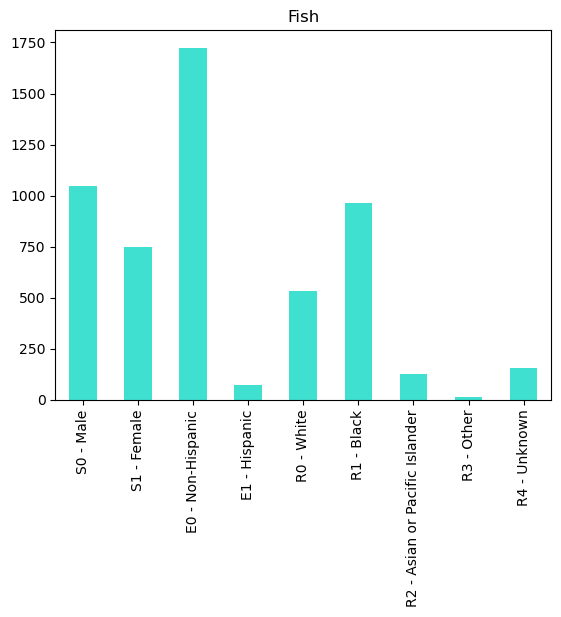

In [19]:
# Attain demographic data about the fish allergen group

pd.concat([fish_df_clean.groupby('GENDER_FACTOR').count(),
          fish_df_clean.groupby('ETHNICITY_FACTOR').count(),
          fish_df_clean.groupby('RACE_FACTOR').count()])['SUBJECT_ID'].plot(kind="bar", color="turquoise")
plt.title('Fish')

In [20]:
#Clean data and copy it in the allallergy_df_clean dataframe
allergy_df_clean=allergy_df.copy()

# Select all the numeric columns 
numeric_col=allergy_df.describe().columns

deleted_rows_count=0
data_err_number=0

# Check if any data in the numeric cols is negative
# Delete the rows with negetive values
for col in numeric_col:
    data_err_number= len(allergy_df_clean[allergy_df_clean[col] <= 0])
    if (data_err_number > 0):
        print(f'{data_err_number} negetive/zero values were removed from {col} column')
        allergy_df_clean=allergy_df_clean.drop(allergy_df_clean[allergy_df_clean[col] <= 0].index)
        deleted_rows_count+=data_err_number

print(f'\n------ {deleted_rows_count} rows deleted. --------')
allergy_df_clean.head()

363 negetive/zero values were removed from AGE_START_YEARS column
9 negetive/zero values were removed from MILK_ALG_START column
1 negetive/zero values were removed from SOY_ALG_START column
6 negetive/zero values were removed from EGG_ALG_START column
1 negetive/zero values were removed from PEANUT_ALG_START column
11 negetive/zero values were removed from ATOPIC_DERM_START column
9 negetive/zero values were removed from ALLERGIC_RHINITIS_START column

------ 400 rows deleted. --------


,SUBJECT_ID,BIRTH_YEAR,GENDER_FACTOR,RACE_FACTOR,ETHNICITY_FACTOR,PAYER_FACTOR,ATOPIC_MARCH_COHORT,AGE_START_YEARS,AGE_END_YEARS,SHELLFISH_ALG_START,...,CASHEW_ALG_END,ATOPIC_DERM_START,ATOPIC_DERM_END,ALLERGIC_RHINITIS_START,ALLERGIC_RHINITIS_END,ASTHMA_START,ASTHMA_END,FIRST_ASTHMARX,LAST_ASTHMARX,NUM_ASTHMARX
0,1,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P1 - Medicaid,False,0.093087,3.164956,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,S1 - Female,R0 - White,E0 - Non-Hispanic,P0 - Non-Medicaid,False,12.232717,18.880219,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,S0 - Male,R0 - White,E1 - Hispanic,P0 - Non-Medicaid,True,0.010951,6.726899,NaN,...,NaN,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,S0 - Male,R4 - Unknown,E1 - Hispanic,P0 - Non-Medicaid,False,2.398357,9.111567,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,S1 - Female,R1 - Black,E0 - Non-Hispanic,P0 - Non-Medicaid,False,0.013689,6.193018,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Create DF of just the allergen response at the beginning of the study 

start_df = allergy_df_clean.filter(like="START")
start_df

,AGE_START_YEARS,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START,ATOPIC_DERM_START,ALLERGIC_RHINITIS_START,ASTHMA_START
0,0.093087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.232717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.010951,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.884326,3.917864,5.127995
3,2.398357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,0.736482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.736482,NaN,5.426420
333196,0.019165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,0.443532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.321697
333198,0.013689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Filter to only allergen columns

start_df = start_df[['SHELLFISH_ALG_START', 'FISH_ALG_START',
       'MILK_ALG_START', 'SOY_ALG_START', 'EGG_ALG_START', 'WHEAT_ALG_START',
       'PEANUT_ALG_START', 'SESAME_ALG_START', 'TREENUT_ALG_START',
       'WALNUT_ALG_START', 'PECAN_ALG_START', 'PISTACH_ALG_START',
       'ALMOND_ALG_START', 'BRAZIL_ALG_START', 'HAZELNUT_ALG_START',
       'CASHEW_ALG_START']]
start_df

,SHELLFISH_ALG_START,FISH_ALG_START,MILK_ALG_START,SOY_ALG_START,EGG_ALG_START,WHEAT_ALG_START,PEANUT_ALG_START,SESAME_ALG_START,TREENUT_ALG_START,WALNUT_ALG_START,PECAN_ALG_START,PISTACH_ALG_START,ALMOND_ALG_START,BRAZIL_ALG_START,HAZELNUT_ALG_START,CASHEW_ALG_START
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Rename columns for clarity

start_clean = start_df.rename(columns={'SHELLFISH_ALG_START':'SHELLFISH', 'FISH_ALG_START':'FISH',
       'MILK_ALG_START':'MILK', 'SOY_ALG_START':'SOY', 'EGG_ALG_START':'EGG', 'WHEAT_ALG_START':'WHEAT',
       'PEANUT_ALG_START':'PEANUT', 'SESAME_ALG_START':'SESAME', 'TREENUT_ALG_START':'TREENUT',
       'WALNUT_ALG_START':'WALNUT', 'PECAN_ALG_START':'PECAN', 'PISTACH_ALG_START':'PISTACHIO',
       'ALMOND_ALG_START':'ALMOND', 'BRAZIL_ALG_START':'BRAZIL', 'HAZELNUT_ALG_START':'HAZELNUT',
       'CASHEW_ALG_START':'CASHEW'})
start_clean

,SHELLFISH,FISH,MILK,SOY,EGG,WHEAT,PEANUT,SESAME,TREENUT,WALNUT,PECAN,PISTACHIO,ALMOND,BRAZIL,HAZELNUT,CASHEW
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Find correlation between this data 

allergy_corr = start_clean.fillna(0).corr()
display(allergy_corr)
all_df = allergy_corr.unstack().sort_values().to_frame()
all_df

,SHELLFISH,FISH,MILK,SOY,EGG,WHEAT,PEANUT,SESAME,TREENUT,WALNUT,PECAN,PISTACHIO,ALMOND,BRAZIL,HAZELNUT,CASHEW
SHELLFISH,1.000000,0.157781,0.050697,0.046602,0.095110,0.046837,0.125691,0.054803,-0.000187,0.030246,0.020847,0.011107,0.013526,0.013816,0.015793,0.020675
FISH,0.157781,1.000000,0.050919,0.054619,0.100138,0.048046,0.095758,0.060426,-0.000102,0.020456,0.017167,0.012476,0.026575,0.013905,0.016291,0.030098
MILK,0.050697,0.050919,1.000000,0.141966,0.243939,0.202227,0.112489,0.045388,0.006486,0.019152,0.018963,0.014121,0.011014,0.011179,0.007654,0.018823
SOY,0.046602,0.054619,0.141966,1.000000,0.164150,0.204030,0.190969,0.119771,-0.000098,0.049194,0.026058,0.007575,0.057511,0.020932,0.047114,0.027729
EGG,0.095110,0.100138,0.243939,0.164150,1.000000,0.174830,0.221584,0.078501,0.007715,0.028968,0.026074,0.026594,0.019508,0.033000,0.023726,0.029629
WHEAT,0.046837,0.048046,0.202227,0.204030,0.174830,1.000000,0.105896,0.057253,-0.000072,0.044360,0.013235,0.012705,0.026009,0.014363,0.017718,0.018497
PEANUT,0.125691,0.095758,0.112489,0.190969,0.221584,0.105896,1.000000,0.158353,0.006180,0.078324,0.053263,0.043337,0.069545,0.039760,0.076702,0.079273
SESAME,0.054803,0.060426,0.045388,0.119771,0.078501,0.057253,0.158353,1.000000,0.019146,0.066792,0.090762,0.053535,0.089369,0.040144,0.075664,0.055086
TREENUT,-0.000187,-0.000102,0.006486,-0.000098,0.007715,-0.000072,0.006180,0.019146,1.000000,-0.000067,-0.000043,-0.000049,-0.000049,-0.000020,-0.000041,-0.000058
WALNUT,0.030246,0.020456,0.019152,0.049194,0.028968,0.044360,0.078324,0.066792,-0.000067,1.000000,0.286995,0.167123,0.212571,0.057884,0.225108,0.152473


0
SHELLFISH TREENUT   -0.000187
TREENUT   SHELLFISH -0.000187
          FISH      -0.000102
FISH      TREENUT   -0.000102
SOY       TREENUT   -0.000098
...                       ...
          SOY        1.000000
MILK      MILK       1.000000
FISH      FISH       1.000000
HAZELNUT  HAZELNUT   1.000000
CASHEW    CASHEW     1.000000

[256 rows x 1 columns]

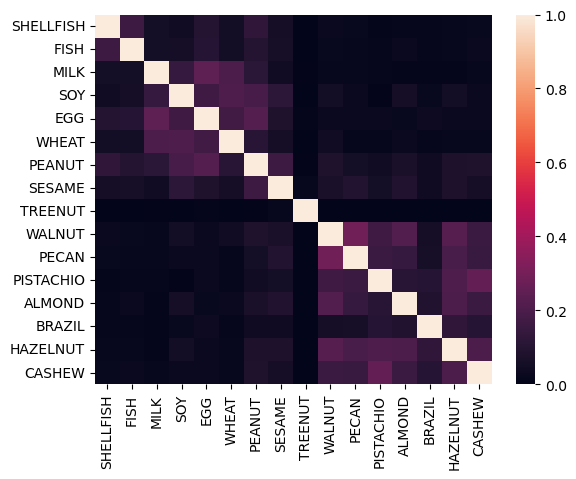

In [25]:
# Visualize this data with a heat map

heat_corr = start_clean.fillna(0).corr()
sns.heatmap(heat_corr);

In [27]:
# Find highest correlated allergens

all_df = all_df.rename(columns={0:"Correlation"})
all_df.dropna()
all_df.sort_values("Correlation").tail(25)

,,Correlation
EGG,PEANUT,0.221584
WALNUT,HAZELNUT,0.225108
HAZELNUT,WALNUT,0.225108
EGG,MILK,0.243939
MILK,EGG,0.243939
PISTACHIO,CASHEW,0.257410
CASHEW,PISTACHIO,0.257410
PECAN,WALNUT,0.286995
WALNUT,PECAN,0.286995
WHEAT,WHEAT,1.000000


In [28]:
# Find lowest correlated allergens

all_df = all_df.rename(columns={0:"Correlation"})
all_df.dropna()
all_df.sort_values("Correlation").head(35)

Correlation
SHELLFISH TREENUT      -0.000187
TREENUT   SHELLFISH    -0.000187
          FISH         -0.000102
FISH      TREENUT      -0.000102
SOY       TREENUT      -0.000098
TREENUT   SOY          -0.000098
          WHEAT        -0.000072
WHEAT     TREENUT      -0.000072
WALNUT    TREENUT      -0.000067
TREENUT   WALNUT       -0.000067
          CASHEW       -0.000058
CASHEW    TREENUT      -0.000058
TREENUT   PISTACHIO    -0.000049
PISTACHIO TREENUT      -0.000049
ALMOND    TREENUT      -0.000049
TREENUT   ALMOND       -0.000049
PECAN     TREENUT      -0.000043
TREENUT   PECAN        -0.000043
HAZELNUT  TREENUT      -0.000041
TREENUT   HAZELNUT     -0.000041
          BRAZIL       -0.000020
BRAZIL    TREENUT      -0.000020
TREENUT   PEANUT        0.006180
PEANUT    TREENUT       0.006180
MILK      TREENUT       0.006486
TREENUT   MILK          0.006486
SOY       PISTACHIO     0.007575
PISTACHIO SOY           0.007575
HAZELNUT  MILK          0.007654
MILK      HAZELNUT      0.007654
EGG       TREENUT       0.007715
TREENUT   EGG           0.007715
ALMOND    MILK          0.011014
MILK      ALMOND        0.011014
SHELLFISH PISTACHIO     0.011107

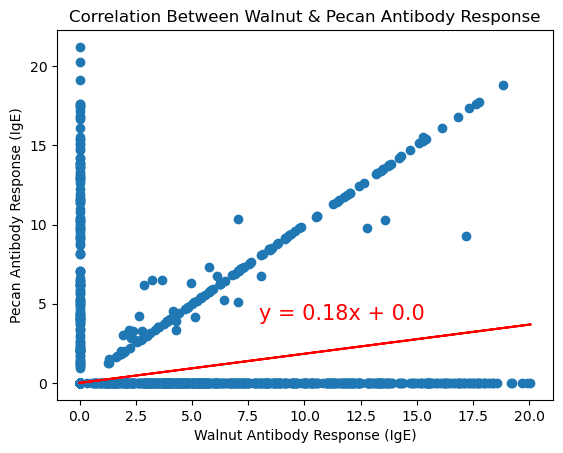

The correlation between both factors is 0.29


In [29]:
# Graph for the most correlated

x_values = ((start_clean['WALNUT']).fillna(0))
y_values = ((start_clean['PECAN']).fillna(0))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,4),fontsize=15,color="red")
plt.xlabel('Walnut Antibody Response (IgE)')
plt.ylabel('Pecan Antibody Response (IgE)')
plt.title("Correlation Between Walnut & Pecan Antibody Response")
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

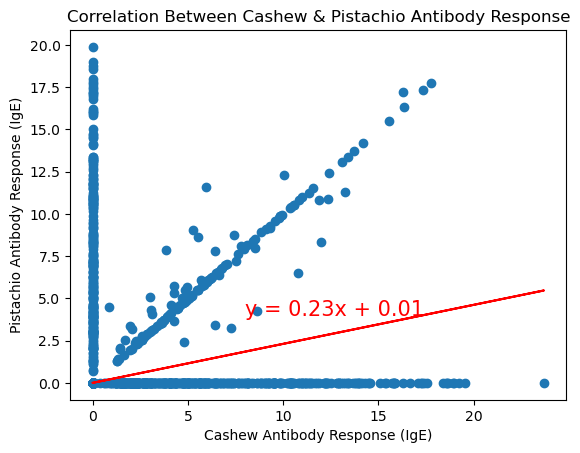

The correlation between both factors is 0.26


In [30]:
# Graph for the most correlated

x_values = ((start_clean['CASHEW']).fillna(0))
y_values = ((start_clean['PISTACHIO']).fillna(0))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,4),fontsize=15,color="red")
plt.xlabel('Cashew Antibody Response (IgE)')
plt.ylabel('Pistachio Antibody Response (IgE)')
plt.title("Correlation Between Cashew & Pistachio Antibody Response")
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

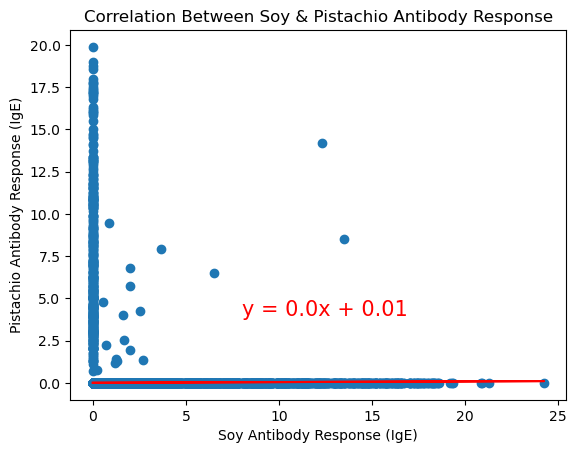

The correlation between both factors is 0.01


In [31]:
# Graph for the least correlated

x_values = ((start_clean['SOY']).fillna(0))
y_values = ((start_clean['PISTACHIO']).fillna(0))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(8,4),fontsize=15,color="red")
plt.xlabel('Soy Antibody Response (IgE)')
plt.ylabel('Pistachio Antibody Response (IgE)')
plt.title("Correlation Between Soy & Pistachio Antibody Response")
plt.show()
correlation = sts.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")